In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [33]:
file_search = pd.read_csv('./Data/네이버 검색어트렌드 8가지 품목 검색량.csv', sep=',')
file_search.head()

,Date,WetTissue,Mask,Shampoo,Omega3,NationalGeographic,Nike,PokemonBread,iPhone
0,2019-01-01,0.56559,1.61046,0.41763,1.05838,4.10906,5.54810,0.07909,8.47009
1,2019-02-01,0.53429,0.49862,0.35894,0.91135,3.20178,6.25700,0.07069,7.84667
2,2019-03-01,0.61167,3.51814,0.38366,1.01046,2.81970,7.18418,0.07543,7.81961
3,2019-04-01,0.49960,0.48491,0.36484,0.93520,2.35521,6.40646,0.07845,7.52693
4,2019-05-01,0.54495,0.43436,0.37971,0.87952,2.21309,6.08084,0.08395,7.74526


In [36]:
file_sales = pd.read_csv('./Data/온라인쇼핑몰 판매매체별 상품군별거래액 (2019~2022.10).csv', encoding='cp949', sep=',')
file_sales = file_sales[['시점', '가전·전자·통신기기', '의복', '신발', '음·식료품', '생활용품', '기타']]
file_sales.columns = ['시점', '가전/전자/통신기기', '의복', '신발', '음식료품', '생활용품', '기타(의료)']
file_sales

,시점,가전/전자/통신기기,의복,신발,음식료품,생활용품,기타(의료)
0,2019.01,1063081,1107321,159646,1193353,831769,223939
1,2019.02,982059,959743,156431,867434,735651,221598
2,2019.03,1324884,1238235,206810,1027271,869192,327742
3,2019.04,1134227,1204083,204171,1058853,821882,195957
4,2019.05,1296165,1278281,217438,1111609,862291,195838
5,2019.06,1177804,1133621,211418,1040151,812251,161668
6,2019.07,1230419,1139671,205065,1092958,845351,182308
7,2019.08,1198465,912495,162540,1215522,874832,203535
8,2019.09,1096363,1187128,201008,1233759,859634,192953
9,2019.1,1200192,1413279,212645,1190483,907585,206265


([<matplotlib.axis.XTick at 0x1f2c26f2370>,
 [Text(0, 0, '2019년'),
  Text(13, 0, '2020년'),
  Text(25, 0, '2021년'),
  Text(37, 0, '2022년'),
  Text(45, 0, '2022년 10월')])

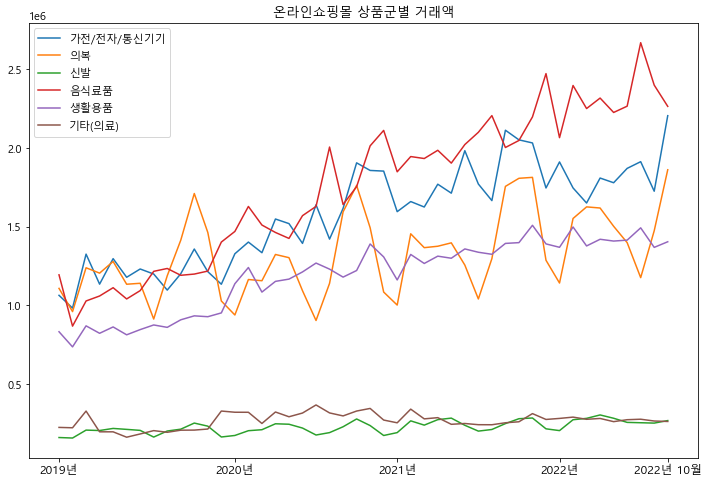

In [47]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 11
plt.figure(figsize=(12, 8))

plt.plot(file_sales['시점'], file_sales['가전/전자/통신기기'])
plt.plot(file_sales['시점'], file_sales['의복'])
plt.plot(file_sales['시점'], file_sales['신발'])
plt.plot(file_sales['시점'], file_sales['음식료품'])
plt.plot(file_sales['시점'], file_sales['생활용품'])
plt.plot(file_sales['시점'], file_sales['기타(의료)'])

plt.legend(['가전/전자/통신기기', '의복', '신발', '음식료품', '생활용품', '기타(의료)'])
plt.title('온라인쇼핑몰 상품군별 거래액')
plt.xticks([0, 13, 25, 37, 45], labels=['2019년', '2020년', '2021년', '2022년', '2022년 10월'], fontsize=12)

In [38]:
# 피어슨 상관계수 검정
# 결과는 순서대로 상관계수, p-value

corr_wettissue = stats.pearsonr(file_search['WetTissue'], file_sales['생활용품'])
print('물티슈:', corr_wettissue)

corr_mask = stats.pearsonr(file_search['Mask'], file_sales['기타(의료)'])
print('마스크:', corr_mask)

corr_shampoo = stats.pearsonr(file_search['Shampoo'], file_sales['생활용품'])
print('샴푸:', corr_shampoo)

corr_omega3 = stats.pearsonr(file_search['Omega3'], file_sales['기타(의료)'])
print('오메가3:', corr_omega3)

corr_national = stats.pearsonr(file_search['NationalGeographic'], file_sales['의복'])
print('내셔널지오그래픽 패딩:', corr_national)

corr_nike = stats.pearsonr(file_search['Nike'], file_sales['신발'])
print('나이키 운동화:', corr_nike)

corr_pokemon = stats.pearsonr(file_search['PokemonBread'], file_sales['음식료품'])
print('포켓몬빵:', corr_pokemon)

corr_iphone = stats.pearsonr(file_search['iPhone'], file_sales['가전/전자/통신기기'])
print('아이폰:', corr_iphone)

물티슈: (0.8618726303464963, 1.4593005580658092e-14)
마스크: (0.3246466412393815, 0.0277170142552584)
샴푸: (0.7780914827937033, 1.975036476943985e-10)
오메가3: (0.4691100584124052, 0.00100684427971092)
내셔널지오그래픽 패딩: (0.5035487694183518, 0.00036068026898323553)
나이키 운동화: (0.41713918764699986, 0.003925797870409121)
포켓몬빵: (0.41200804264725727, 0.004440604899880114)
아이폰: (-0.3387119207913757, 0.021303602828846305)


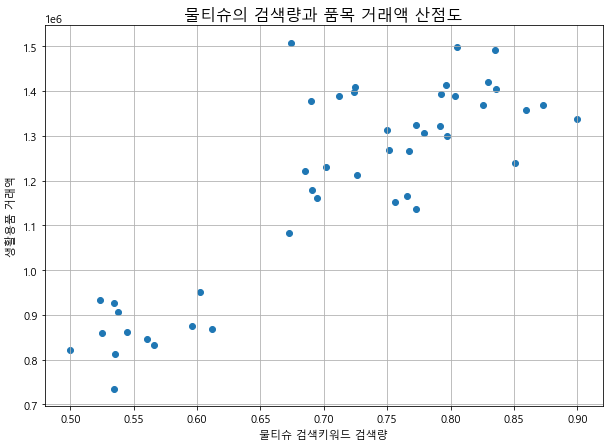

In [39]:
# 물티슈
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 7))
plt.title('물티슈의 검색량과 품목 거래액 산점도', fontsize=16)
plt.scatter(file_search['WetTissue'], file_sales['생활용품'])       # 산점도
plt.xlabel('물티슈 검색키워드 검색량')
plt.ylabel('생활용품 거래액')
plt.grid()
plt.show()

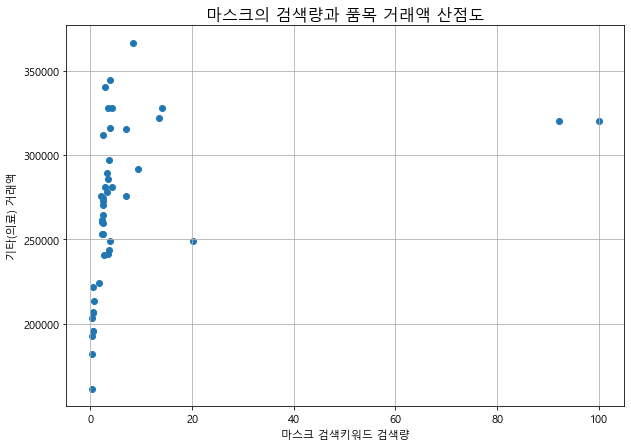

In [40]:
# 마스크
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 7))
plt.title('마스크의 검색량과 품목 거래액 산점도', fontsize=16)
plt.scatter(file_search['Mask'], file_sales['기타(의료)'])       # 산점도
plt.xlabel('마스크 검색키워드 검색량')
plt.ylabel('기타(의료) 거래액')
plt.grid()
plt.show()

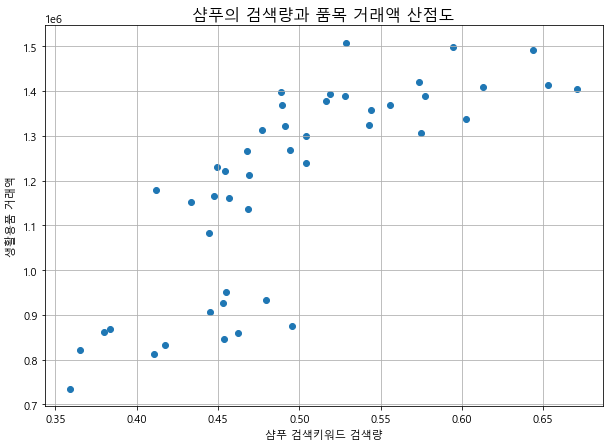

In [41]:
# 샴푸
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 7))
plt.title('샴푸의 검색량과 품목 거래액 산점도', fontsize=16)
plt.scatter(file_search['Shampoo'], file_sales['생활용품'])       # 산점도
plt.xlabel('샴푸 검색키워드 검색량')
plt.ylabel('생활용품 거래액')
plt.grid()
plt.show()

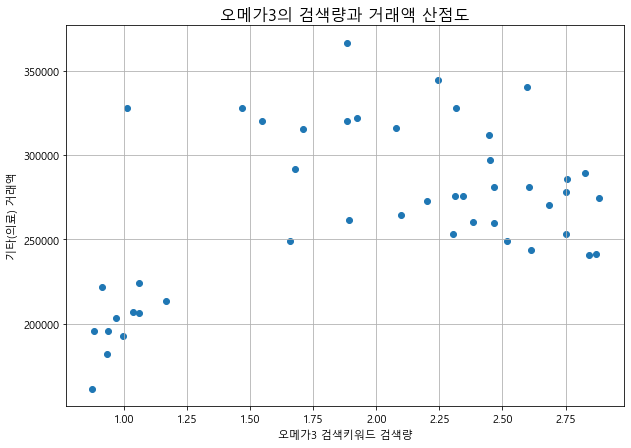

In [42]:
# 오메가3
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 7))
plt.title('오메가3의 검색량과 거래액 산점도', fontsize=16)
plt.scatter(file_search['Omega3'], file_sales['기타(의료)'])       # 산점도
plt.xlabel('오메가3 검색키워드 검색량')
plt.ylabel('기타(의료) 거래액')
plt.grid()
plt.show()

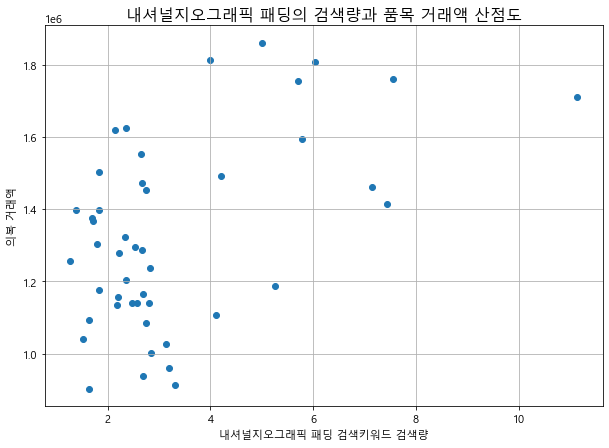

In [43]:
# 내셔널지오그래픽 패딩
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 7))
plt.title('내셔널지오그래픽 패딩의 검색량과 품목 거래액 산점도', fontsize=16)
plt.scatter(file_search['NationalGeographic'], file_sales['의복'])       # 산점도
plt.xlabel('내셔널지오그래픽 패딩 검색키워드 검색량')
plt.ylabel('의복 거래액')
plt.grid()
plt.show()

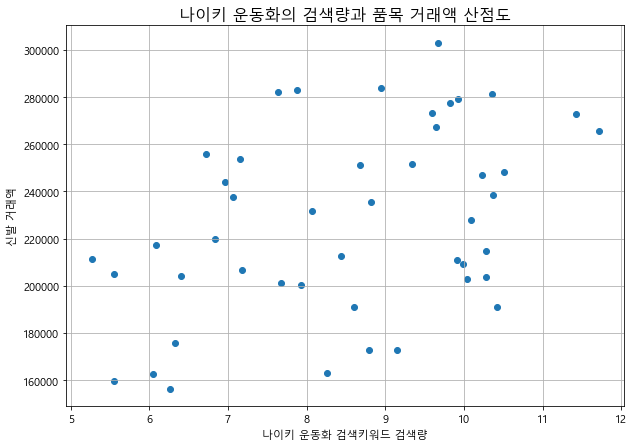

In [44]:
# 나이키 운동화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 7))
plt.title('나이키 운동화의 검색량과 품목 거래액 산점도', fontsize=16)
plt.scatter(file_search['Nike'], file_sales['신발'])       # 산점도
plt.xlabel('나이키 운동화 검색키워드 검색량')
plt.ylabel('신발 거래액')
plt.grid()
plt.show()

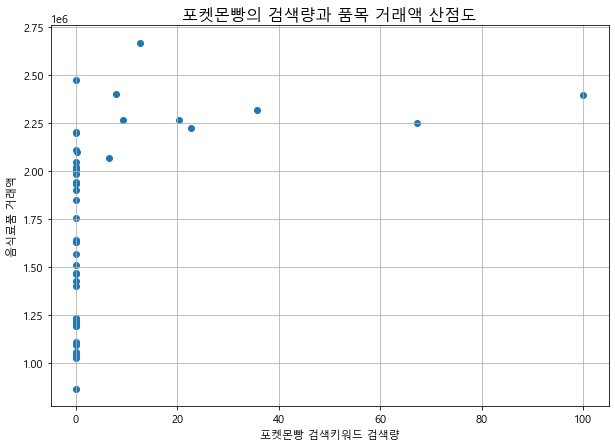

In [45]:
# 포켓몬빵
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 7))
plt.title('포켓몬빵의 검색량과 품목 거래액 산점도', fontsize=16)
plt.scatter(file_search['PokemonBread'], file_sales['음식료품'])       # 산점도
plt.xlabel('포켓몬빵 검색키워드 검색량')
plt.ylabel('음식료품 거래액')
plt.grid()
plt.show()

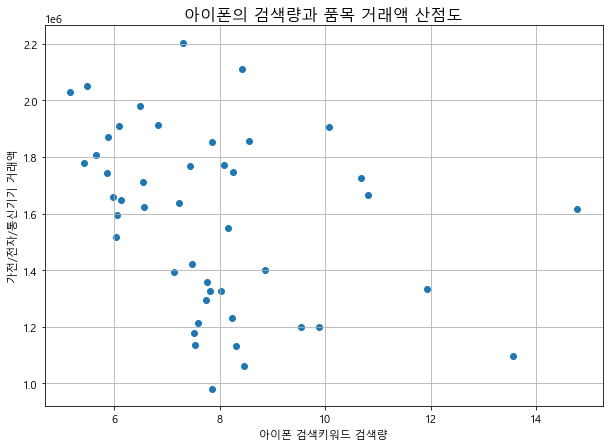

In [46]:
# 아이폰
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 7))
plt.title('아이폰의 검색량과 품목 거래액 산점도', fontsize=16)
plt.scatter(file_search['iPhone'], file_sales['가전/전자/통신기기'])       # 산점도
plt.xlabel('아이폰 검색키워드 검색량')
plt.ylabel('가전/전자/통신기기 거래액')
plt.grid()
plt.show()